In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# 테스트 데이터 불러오기
file_name = r'C:\VSCode\KDT\머신러닝\DAY03\test_car_price_data.csv'
test_df = pd.read_csv(file_name)
test_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


## 데이터 전처리

In [285]:
test_df.info()
# New_Price 열이 가격을 나타내는 열인 것 같음
# NAN 값이 존재하기 때문에 확인해야함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [286]:
mask = test_df['New_Price'].isna()
new_test_df = test_df[mask]

In [287]:
# NAN 값을 측정할 수 없으므로 해당 행들을 삭제
new_test_df.index # NAN값을 가지고 있는 행들의 인덱스

Index([   0,    1,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233],
      dtype='int64', length=1052)

In [288]:
test_df.drop(new_test_df.index,axis=0,inplace=True)
test_df.drop('Unnamed: 0',axis=1,inplace=True)
test_df.reset_index(drop=True,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               182 non-null    object 
 1   Location           182 non-null    object 
 2   Year               182 non-null    int64  
 3   Kilometers_Driven  182 non-null    int64  
 4   Fuel_Type          182 non-null    object 
 5   Transmission       182 non-null    object 
 6   Owner_Type         182 non-null    object 
 7   Mileage            182 non-null    object 
 8   Engine             182 non-null    object 
 9   Power              182 non-null    object 
 10  Seats              182 non-null    float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.2+ KB


In [289]:
# New_Price 행이 object 타입이기 때문에 float 타입으로 바꿔줘야함.
test_df['New_Price'].unique()
# Cr = 100 Lakh
price_data = test_df['New_Price'].values
price = []
for i in price_data:
    if ' Lakh' in i:
        float(i.replace(' Lakh',''))
        print(i)
    if ' Cr' in i:
        float(i.replace(' Cr',''))*100
        print(i)

# test_df['price'] = price
# test_df

25.27 Lakh
9.27 Lakh
14.95 Lakh
70.43 Lakh
11.89 Lakh
11.02 Lakh
8.94 Lakh
5.78 Lakh
9.4 Lakh
6.3 Lakh
6.41 Lakh
40.62 Lakh
8.8 Lakh
15.59 Lakh
44.8 Lakh
5.74 Lakh
7.43 Lakh
52.96 Lakh
4.59 Lakh
11.48 Lakh
15.93 Lakh
14.32 Lakh
3.99 Lakh
1.58 Cr
6.15 Lakh
8.95 Lakh
62.07 Lakh
31.93 Lakh
15.88 Lakh
43.65 Lakh
8.23 Lakh
8.57 Lakh
7.19 Lakh
56.98 Lakh
14.13 Lakh
11.48 Lakh
11.2 Lakh
14.13 Lakh
6.41 Lakh
9.12 Lakh
3.91 Lakh
25.04 Lakh
8.92 Lakh
5.01 Lakh
19.01 Lakh
9.45 Lakh
3.75 Cr
35.16 Lakh
6.78 Lakh
6.24 Lakh
55.61 Lakh
9.42 Lakh
8.44 Lakh
4.56 Lakh
29.9 Lakh
7.12 Lakh
9.94 Lakh
6.44 Lakh
7.67 Lakh
16.82 Lakh
15.59 Lakh
15.57 Lakh
9.51 Lakh
11.75 Lakh
63.47 Lakh
6.7 Lakh
34.1 Lakh
5.31 Lakh
15.24 Lakh
36.5 Lakh
37.03 Lakh
10.86 Lakh
8.85 Lakh
59.12 Lakh
5.79 Lakh
3.96 Lakh
10.55 Lakh
15.73 Lakh
8.91 Lakh
4.7 Lakh
7.67 Lakh
27.56 Lakh
17 Lakh
4.75 Lakh
40.73 Lakh
21.77 Lakh
11.47 Lakh
7.08 Lakh
77.92 Lakh
14.86 Lakh
26.14 Lakh
32.41 Lakh
40.73 Lakh
33.36 Lakh
6.63 Lakh
12.05 Lakh
86.97 

In [290]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               182 non-null    object 
 1   Location           182 non-null    object 
 2   Year               182 non-null    int64  
 3   Kilometers_Driven  182 non-null    int64  
 4   Fuel_Type          182 non-null    object 
 5   Transmission       182 non-null    object 
 6   Owner_Type         182 non-null    object 
 7   Mileage            182 non-null    object 
 8   Engine             182 non-null    object 
 9   Power              182 non-null    object 
 10  Seats              182 non-null    float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.2+ KB


In [291]:
test_df_corr = test_df.corr(numeric_only=True)

<Axes: >

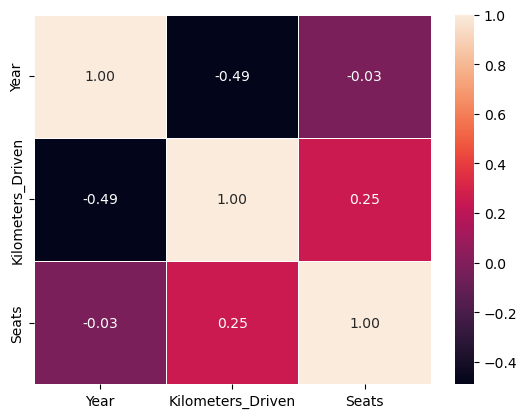

In [292]:
sns.heatmap(test_df_corr,annot=True,fmt='.2f',linewidths=0.5)